# L&S 88 - Final Project - Blank Notebook

_Notebook created by Chris Pyles_

This notebook is intended to give you some basic information on manipulating rectangular data using `pandas` and `datascience`. The `pandas` library is the standard library for data manipulation, however most Data 8 students are more familiar with the `datascience` library. This notebook covers basic operations and how to do them in both libraries.

**Table of Contents**
1. [Dependences](#Dependencies)
2. [Loading Data](#Loading-Data)
3. [Moving Between `pandas` and `datascience`](#Moving-Between-pandas-and-datascience)
4. [Rows and Columns](#Rows-and-Columns)
5. [Accessing Vaues](#Accessing-Values)
6. [Missing Values](#Missing-Values)
7. [Descriptive Statistics](#Descriptive-Statistics)
8. [Grouping](#Grouping)
9. [Manipulating Values](#Manipulating-Values)
10. [Exporting Figures](#Exporting-Figures)
11. [Exporting Data](#Exporting-Data)
12. [Conclusion](#Conclusion)

### Dependencies

In order to use the `pandas` and `datascience` packages, they first need to be loaded. The code below loads both libraries in the way that most students are used to using them, along with the `numpy` and `pyplot` libraries.

In [1]:
from datascience import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

# the below is not usually necessary; we use it here to make
# nice HTML displays in this notebook
from IPython.display import display

### Loading Data

Most of the data that you will use is coded in CSV (comma-separated values) files. These are basic text files that have rows of data on each line, with the values in each column delimited by commas:

```
Col_1,Col_2,Col_3
1,2,3
4,5,6
```

There are other ways of encoding rectangular data, but this is the most common and the easiest to work with. The `pandas` and `datascience` libraries assume that the first line of the file contains the column names, so if they names of columns are not included in the file you will need to use more code than what is provided below.

In [2]:
# pandas
df = pd.read_csv('../data/insurance.csv')

# datascience
tbl = Table.read_table('../data/insurance.csv')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


Sometimes, you will encounter files that are not delimited by commas but by other characters or whitespace. Such a file make look like this:

```
Col_1    Col_2    Col_3
1        2        3
4        5        6
```

```
Col_1|Col_2|Col_3
1|2|3
4|5|6
```

The first of these file formats is called TSV (tab-separated values) and the delimiter is a tab (`'\t'` in Python). The second is a generic text file that uses a pipe as the delimiter. To read data files with these formats into Python, you will need to use `pandas` to first load the file and then, if you need to, you can load it into Tables.

To use `pandas` to load a file of this type, you use `pd.read_csv()` and set the `sep` argument to a string of length 1 containing the delimiter for that file, e.g. `'\t'` in the case of a TSV file or `'|'` for the pipe-separated file above.

In [3]:
# tsv file
df_tsv = pd.read_csv('../data/insurance.tsv', sep='\t')

# pipe
df_pipe = pd.read_csv('../data/insurance.txt', sep='|')

# to take these into datascience
tbl_tsv = Table.from_df(df_tsv)
tbl_pipe = Table.from_df(df_pipe)

print('TSV File:')
display(df_tsv.head())
print('\n\nPipe-Separated File:')
display(df_pipe.head())

TSV File:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520




Pipe-Separated File:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Some data sets you may encounter may also be in DTA format (from Stata). To load Stata data sets, you need to use the `pd.read_stata()` function and then, optionally, transfer that dataframe to Tables. The function call looks like this:

```python
df_stata = pd.read_stata("../data/insurance.dta")

tbl_stata = Table.from_df(df_stata)
```

### Moving Between `pandas` and `datascience`

The `pandas` and `datascience` libraries are both good for different things, and in order to optimize your code you will need to be able to transfer your data between the two. The code for this is provided below.

In [4]:
# pandas to datascience
tbl2 = Table.from_df(df)

# datascience to pandas
df2 = tbl.to_df()

### Rows and Columns 

To get row and column counts, `pandas` provides the `shape` attribute of a dataframe, which is the tuple `(num_rows, num_cols)`. This means that `df.shape[0]` gives the number of rows and `df.shape[1]` the number of columns. The `datascience` library provides the `num_rows` and `num_columns` attributes, which are self-explanatory.

In [5]:
# pandas
df.shape

# datascience
tbl.num_rows, tbl.num_columns

(1338, 7)

To access the labels of the columns, `pandas` has `columns` and `datascience` has `labels`.

In [6]:
# pandas
df.columns

# datascience
tbl.labels

('age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges')

### Accessing Values

For all non-continuous variables, it is usually important to understand the possible values of the variable; that is, to know the variable's _unique_ values. `pandas` has a built-in method for its `Series` object, `Series.unique()`, which returns an array of the unique values. While `datascience` does not have a built-in method, it is a simple thing to export a column as an array and pass it to `np.unique`.

In [7]:
# pandas
df['age'].unique()

# datascience
np.unique(tbl.column('age'))

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

Filtering rows is also an important part of accessing values. In `pandas`, you filter rows by indexing your dataframe with a boolean `Series` object, which you can create using a column of your dataframe and comparison operators:

```python
df[df['col_1'] > 100]
```

A more advance version of this indexing is provided below. The `datascience` library provides the `.where()` method to filter rows, which uses a column name and a predicate. For a full list of predicate functions, see the [`datascience.predicates` documentation](http://data8.org/datascience/predicates.html).

In [8]:
# pandas
df[(df['age'] >= 40) & (df['children'] == 0)]

# datascience
tbl.where('age', are.above_or_equal_to(40)).where('children', 0)

age,sex,bmi,children,smoker,region,charges
60,female,25.84,0,no,northwest,28923.1
62,female,26.29,0,yes,southeast,27808.7
56,female,39.82,0,no,southeast,11090.7
56,male,40.3,0,no,southwest,10602.4
60,female,36.005,0,no,northeast,13228.8
63,female,23.085,0,no,northeast,14451.8
63,male,28.31,0,no,northwest,13770.1
60,male,39.9,0,yes,southwest,48173.4
55,male,37.3,0,no,southwest,20630.3
60,female,24.53,0,no,southeast,12629.9


### Missing Values

It is inevitable: you will eventually need to deal with missing values. As a refresher, recall this slide from Lecture 9:

![NaN Values](../images/nan.jpg)

The easiest way to deal with missing values is using the `pandas` library, so we use the `.to_df()` method on the table so that we can use `pandas` functions. To determine whether or not a value is `NaN`, the dataframe method `.isnull()` is very useful. It turns every cell in a dataframe into `True` or `False` to indicate whether or not that cell contained a missing value. You can fill these values using `.fillna()` and drop all rows with missing values with `.dropna()`.

In [9]:
# pandas
df.isnull()

# datascience
tbl.to_df().isnull().head() # .head() not necessary, just there for tidy output
                            # can convert this df back to tables using above commands

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


If you have an array-like object (basically any iterable), you can use `np.isnan` to get an array of boolean values indicating whether or not each item is `NaN`.

In [10]:
np.isnan(df['age'].values)

array([False, False, False, ..., False, False, False])

To remove rows with `NaN` in a _specific column_, you can combine the `.isnull()` method with dataframe indexing to remove rows using a boolean `Series`. You can also use the `.where()` method for Tables to filter rows in a column and pass a function which determines whether or not a value is `NaN`.

In [11]:
# pandas
df[~(df['age'].isnull())]

# datascience
def not_nan(x):
    return not np.isnan(x)

tbl.where('age', not_nan)

age,sex,bmi,children,smoker,region,charges
19,female,27.9,0,yes,southwest,16884.9
18,male,33.77,1,no,southeast,1725.55
28,male,33,3,no,southeast,4449.46
33,male,22.705,0,no,northwest,21984.5
32,male,28.88,0,no,northwest,3866.86
31,female,25.74,0,no,southeast,3756.62
46,female,33.44,1,no,southeast,8240.59
37,female,27.74,3,no,northwest,7281.51
37,male,29.83,2,no,northeast,6406.41
60,female,25.84,0,no,northwest,28923.1


### Descriptive Statistics

In order to understand the distribution of your numerical data, it can be very useful to look at descriptive statistics of the values. The `pandas` library has a built-in `.describe()` method that filters out non-numerical columns and then provides the count of non-`NaN` values; mean; SD; minimum; 25th, 50th, and 75th percentiles; and the maximum.

In [12]:
# pandas
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The `datascience` library allows you to compute statistics on each column of your table, but it has two drawbacks:
1. It requires you to specify which operations you want to run, and
2. It does not filter out non-numerical columns

To use the `datascience` library, use the `.stats()` method; this requires you to specify which statistics you want to use to aggregate each column, which you do by passing a list of functions as the `ops` argument.

In [13]:
# datascience
tbl.stats(ops = [min, max, np.mean, np.std])

statistic,age,sex,bmi,children,smoker,region,charges
min,18,female,15.96,0,no,northeast,1121.87
max,64,male,53.13,5,yes,southwest,63770.4
mean,39.207,,30.6634,1.09492,,,13270.4
std,14.0447,,6.09591,1.20504,,,12105.5


### Grouping

To group rows by a value in a column in `pandas`, you pass the column name to the `.group()` method and then use an aggregation function to aggregate the values by column in each group. You can use some built-in aggregators (e.g. `.count()`, `.sum()`, `.min()`, `.max()`, `.mean()`) or pass your own function to `.agg()`. In the `datascience` library, you can group by a column with the `.group()` method; this defaults to counts, but you can pass an optional second argument with an aggregator function.

In [14]:
# pandas
df.groupby('sex').count() # can also use .agg()

# datascience
tbl.group('sex')

sex,count
female,662
male,676


### Manipulating Values

The most common way to manipulate a data set is to apply a predefined function on each element of a column. While some common functions are built into `pandas`, the `datascience` library does not have this. Both libraries, however, feature a `.apply()` method that allows you to apply a function repeatedly to each value in a column. With `pandas`, the implementation is a bit more complicated, but we will see that it is not difficult.

In [15]:
def pandas_square(x):
    var = x["age"] # in pandas, you need to select out the column you want to edit
                   # within the function that you're apply to the df, as the argument
                   # passed to the function is actually a Series that contains the
                   # values for that row
    return var**2

pd_squared_ages = df.apply(pandas_square, axis=1)

# to add this variable back into the df, we need to initialize a column and
# set its values:
df["age^2"] = pd_squared_ages
df.head()

,age,sex,bmi,children,smoker,region,charges,age^2
0,19,female,27.900,0,yes,southwest,16884.92400,361
1,18,male,33.770,1,no,southeast,1725.55230,324
2,28,male,33.000,3,no,southeast,4449.46200,784
3,33,male,22.705,0,no,northwest,21984.47061,1089
4,32,male,28.880,0,no,northwest,3866.85520,1024


In [16]:
def datascience_square(x):
    return x**2 # datascience does not require element selection

ds_squared_ages = tbl.apply(datascience_square, "age")
tbl = tbl.with_column("age^2", ds_squared_ages)
tbl.show(5)

age,sex,bmi,children,smoker,region,charges,age^2
19,female,27.9,0,yes,southwest,16884.9,361
18,male,33.77,1,no,southeast,1725.55,324
28,male,33,3,no,southeast,4449.46,784
33,male,22.705,0,no,northwest,21984.5,1089
32,male,28.88,0,no,northwest,3866.86,1024


### Exporting Figures

To export figures generated in `pyplot`, you need to append the `plt.savefig()` command to the end of your function call. Make sure you pass a filename to the function, so that it goes to the correct output folder. Because the `pyplot` calls are the same for `datascience` and `pandas`, we demonstrate with arbitrary arrays below.

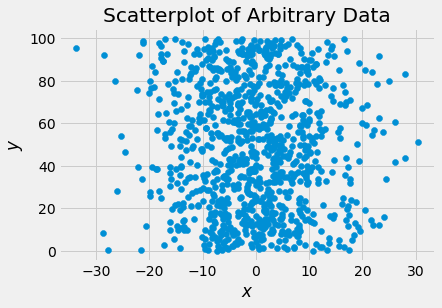

In [17]:
x = np.random.normal(0, 10, 1000)
y = np.random.uniform(0, 100, 1000)

plt.scatter(x, y)
plt.title("Scatterplot of Arbitrary Data")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.savefig("../output/demo-plot.png")

### Exporting Data

If you make some modifications to the data set or do some data cleaning, you may want to export your data from Python to make it easier to pick up later or to reproduce. For this reason, there are `pandas` and `datascience` functions that allow you to export a DataFrame or Table object to a text file, which you can then load back into Python later. To export as a CSV file, you pass the file name (or file location, if it's going to another folder) to the `.to_csv()` method.

In [18]:
# pandas
df.to_csv('../output/insurance_pandas.csv', index=False)

# datascience
tbl.to_csv('../output/insurance_datascience.csv')

If you're exporting a `pandas` DataFrame, make sure that you set the `index` argument to `False`, otherwise your DataFrame will export with an added column containing the DataFrame's index.

If you want to save as one of the other filetypes we discussed when importing data (e.g. TSV), you will have to export through `pandas` by setting the `sep` argument of the `.to_csv()` method. This is easily accomplished if you have a Table by transferring that table to `pandas` first.

In [19]:
# transfer to pandas, from above
df_from_tbl = tbl.to_df()

# export as tsv
df.to_csv('../output/insurance_padas.tsv', index=False, sep='\t')
df_from_tbl.to_csv('../output/insurance_datascience.tsv', index=False, sep='\t')

### Conclusion

Hopefully, this notebook gave you most of the coding background that you need in order to do your analyses; everything else you should have learning in Data 8. If you have any questions on these functions or how to do something, start by Googling what you're trying to accomplish; you will be surprised how often someone else has had the same question and has had it answered by someone online. If you're still stuck, please post on Piazza or email one of us.